Generated text: I will generate a high-definition image featuring a whimsical scene: a large, leafy tree with a stylish top hat perched jauntily on one of its branches, floating cheerfully above a vibrant, futuristic science fiction city. The cityscape will be characterized by sleek, modern architecture and an abundance of lush greenery interspersed among the buildings, creating a harmonious blend of nature and technology.


Image saved as 'gemini-native-image.png'


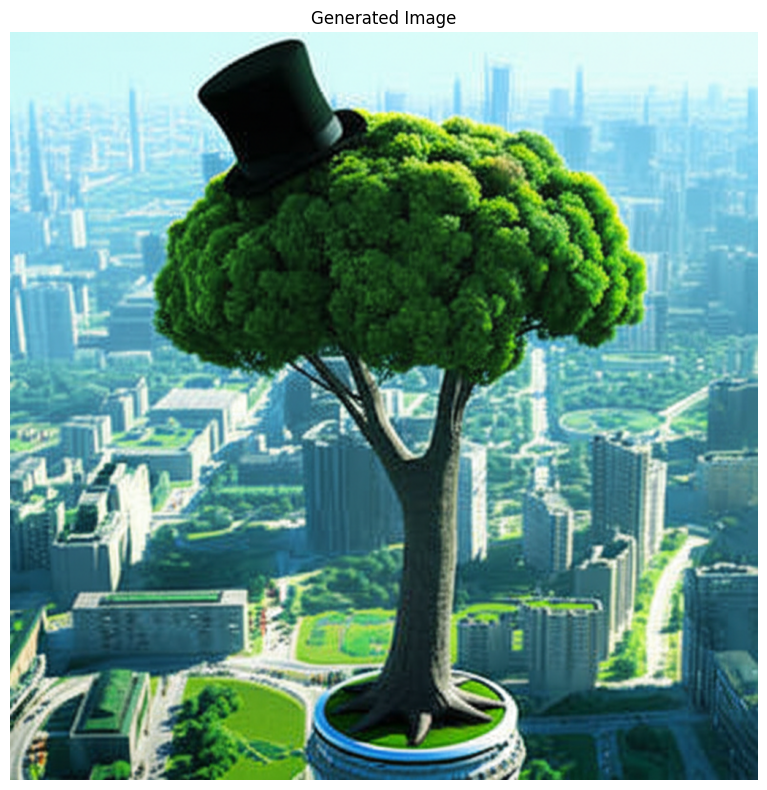

In [4]:
import os
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get API key from environment variable
API_KEY = os.getenv('GOOGLE_API_KEY')

if not API_KEY:
    raise ValueError("GOOGLE_API_KEY not found in environment variables. Please check your .env file.")

def generate_image_with_gemini(prompt):
    """
    Generate an image using Gemini API and display it in Jupyter notebook
    """
    try:
        client = genai.Client(api_key=API_KEY)
        
        response = client.models.generate_content(
            model="gemini-2.0-flash-preview-image-generation",
            contents=prompt,
            config=types.GenerateContentConfig(
                response_modalities=['TEXT', 'IMAGE']
            )
        )
        
        if not response.candidates:
            print("No response generated")
            return None
            
        for part in response.candidates[0].content.parts:
            if part.text is not None:
                print("Generated text:", part.text)
            elif part.inline_data is not None:
                try:
                    # Convert bytes to PIL Image
                    image = Image.open(BytesIO(part.inline_data.data))
                    
                    # Save the image
                    image.save('gemini-native-image.png')
                    print("Image saved as 'gemini-native-image.png'")
                    
                    # Display image in Jupyter notebook
                    plt.figure(figsize=(10, 8))
                    plt.imshow(image)
                    plt.axis('off')  # Hide axes
                    plt.title("Generated Image")
                    plt.tight_layout()
                    plt.show()
                    
                    return image
                    
                except Exception as img_error:
                    print(f"Error processing image: {img_error}")
                    return None
                    
    except Exception as e:
        print(f"Error generating content: {e}")
        return None

# Your original prompt
contents = ('HD image of a tree'
            'with a top hat flying happy '
            'futuristic scifi city with lots of greenery')

# Generate and display the image
generated_image = generate_image_with_gemini(contents)